In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.phantom import Phantom
from pyinverse.grid import FFTRegularAxis, RegularGrid

In [3]:
p = Phantom()
e = p._ellipses[2]

In [4]:
e

Ellipse(rho=-0.2, a=0.11, b=0.31, x0=0.22, y0=0.0, phi_deg=-18.0)

In [5]:
N1 = N2 = 32
grid = RegularGrid(FFTRegularAxis(N1, d=1/2), FFTRegularAxis(N2, d=1/2))

In [6]:
A = e.raster(grid)

<IPython.core.display.Javascript object>


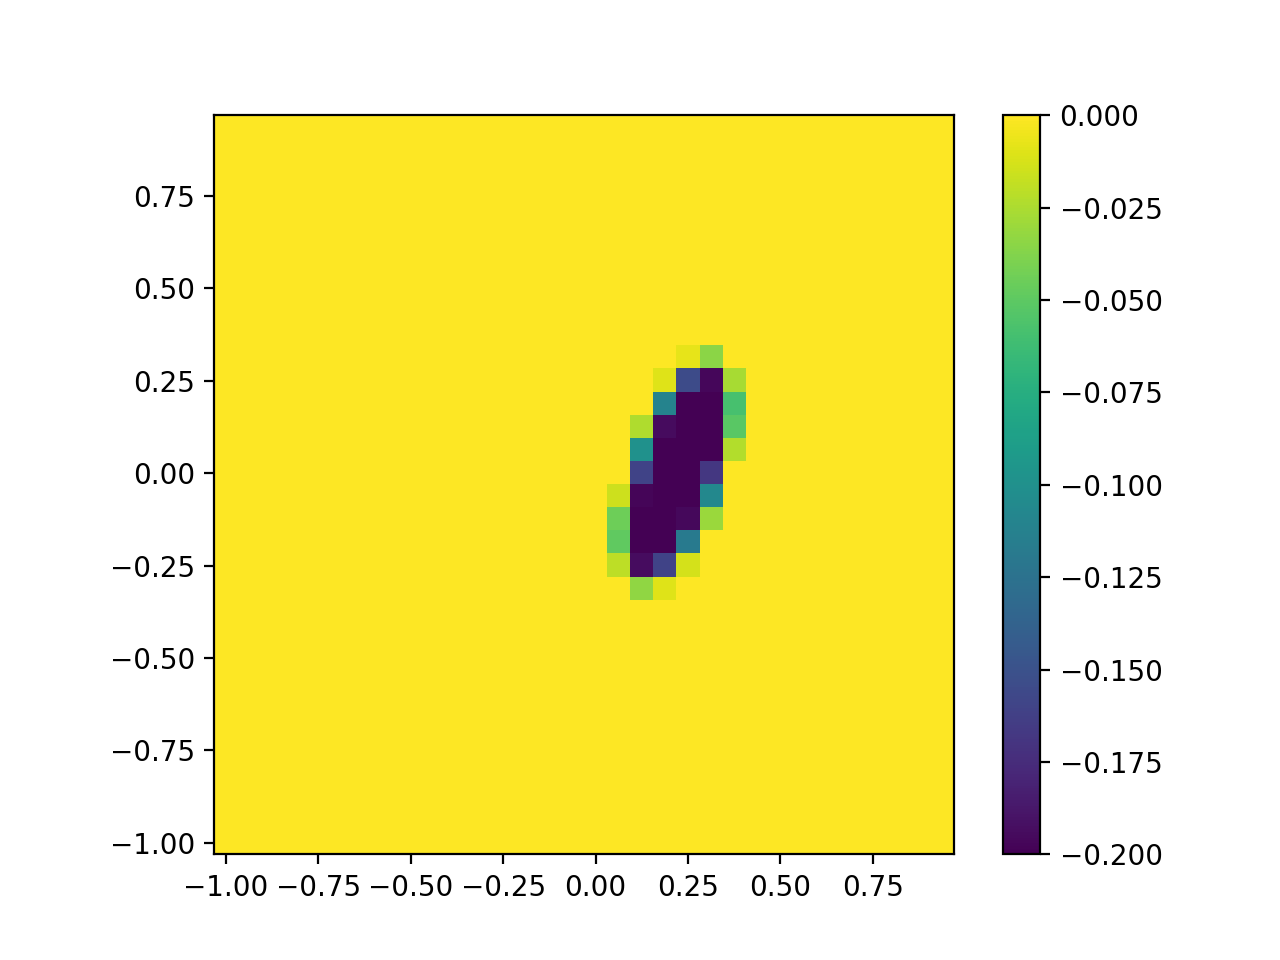

In [7]:
fig, ax = plt.subplots()
im = grid.imshow(ax, A)
fig.colorbar(im);

In [8]:
grid_ft, A_ft = grid.ft(A)

<IPython.core.display.Javascript object>


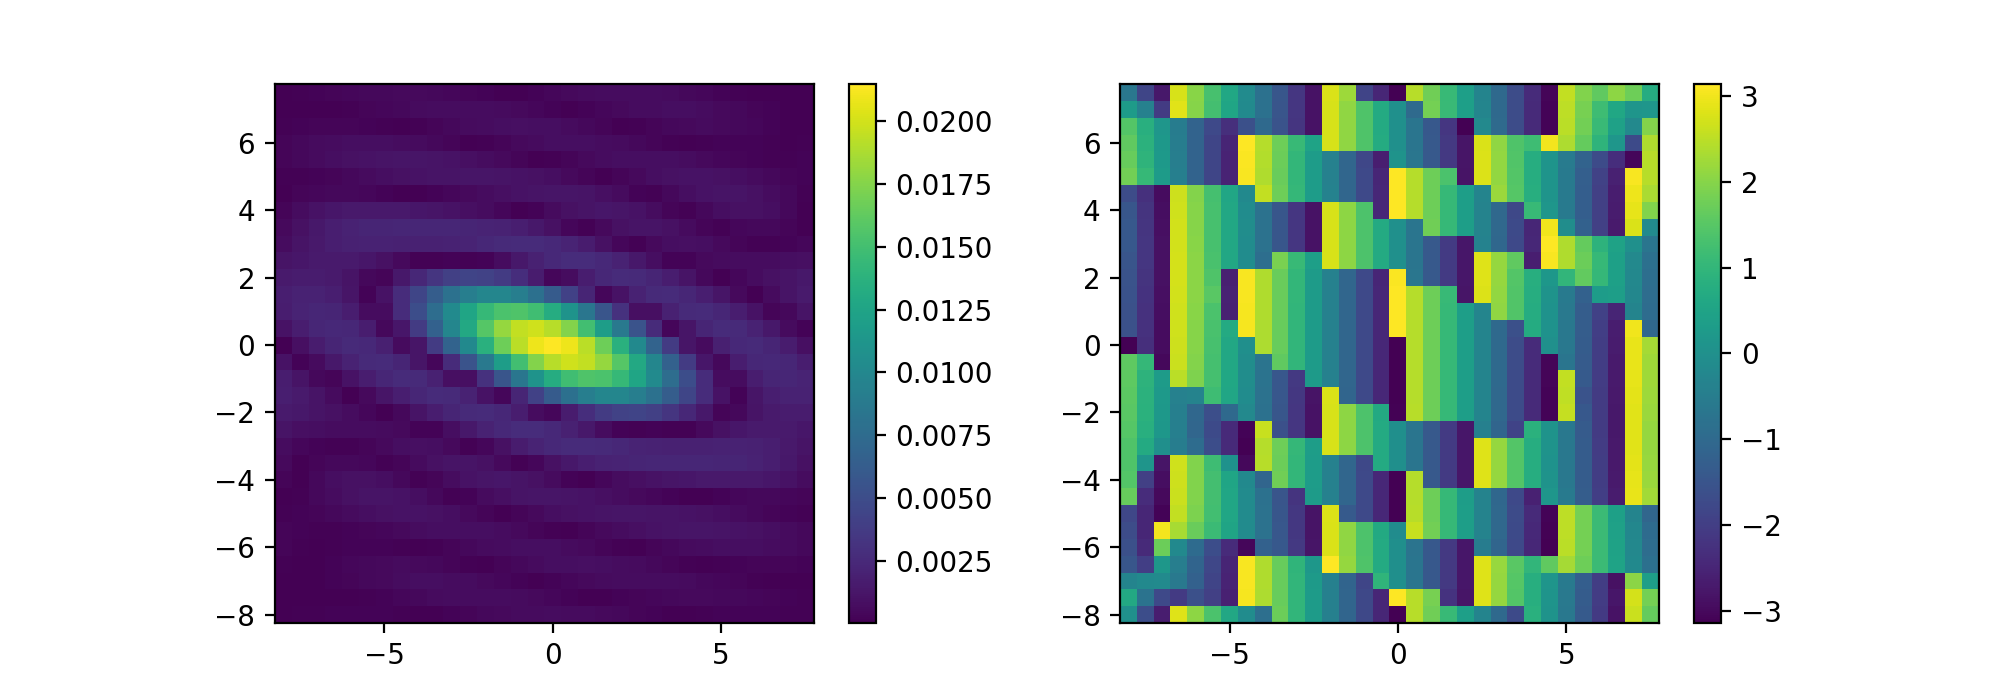

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_ft.imshow(ax[0], np.abs(A_ft))
fig.colorbar(im, ax=ax[0])
im = grid_ft.imshow(ax[1], np.angle(A_ft))
fig.colorbar(im, ax=ax[1]);

In [10]:
E_theory = e.fourier_transform_grid(grid_ft)

<IPython.core.display.Javascript object>


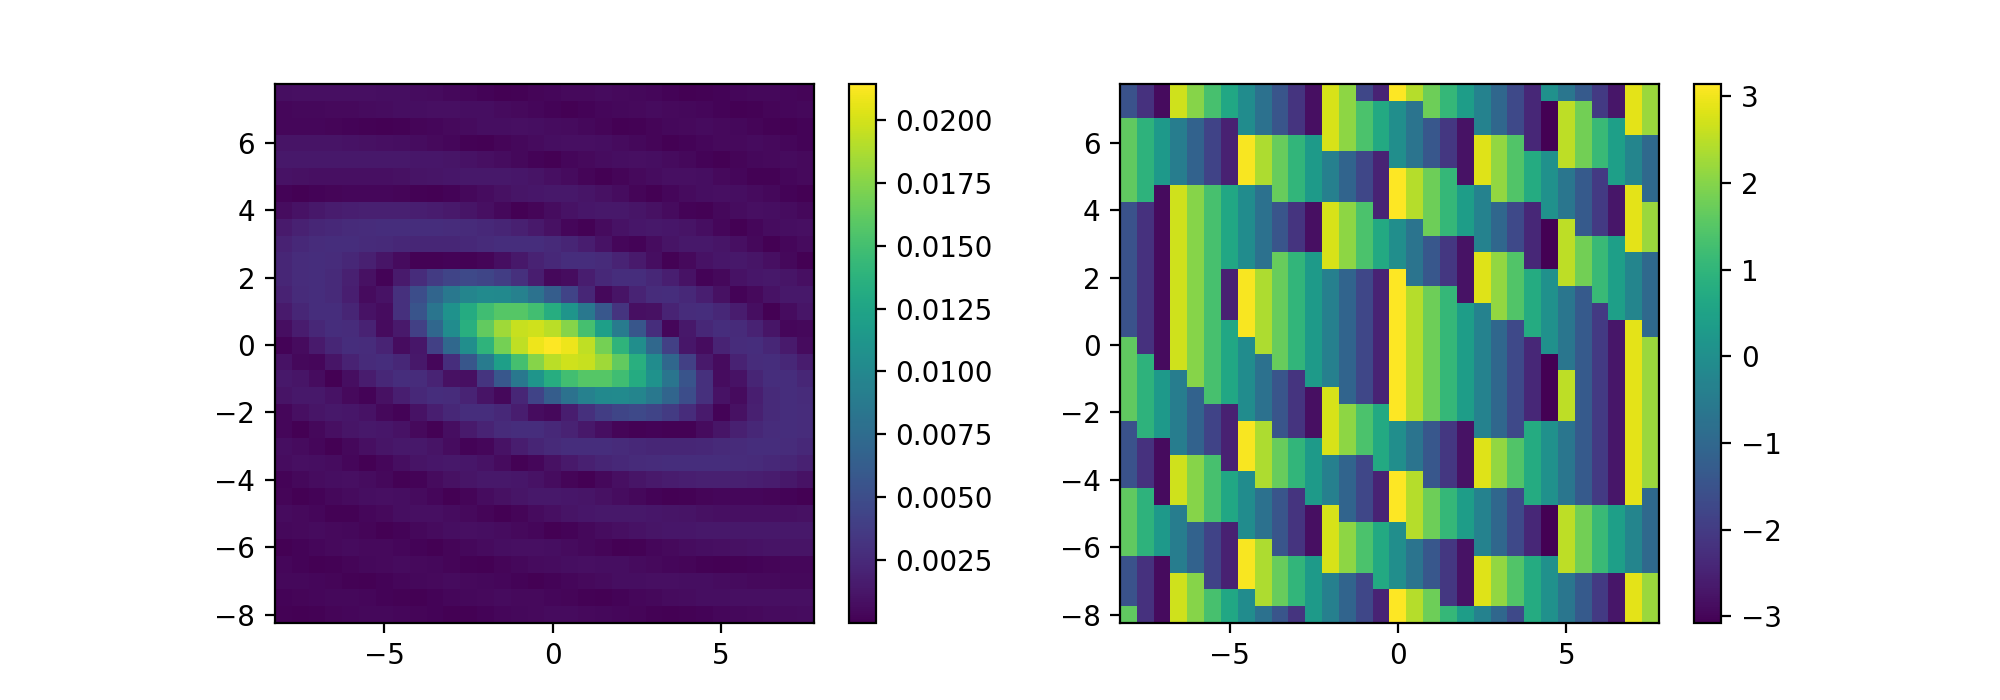

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_ft.imshow(ax[0], np.abs(E_theory))
fig.colorbar(im, ax=ax[0])
im = grid_ft.imshow(ax[1], np.angle(E_theory))
fig.colorbar(im, ax=ax[1]);

In [12]:
grid_ft_real, A_ft_real = grid.ft(A, real=True)

<IPython.core.display.Javascript object>


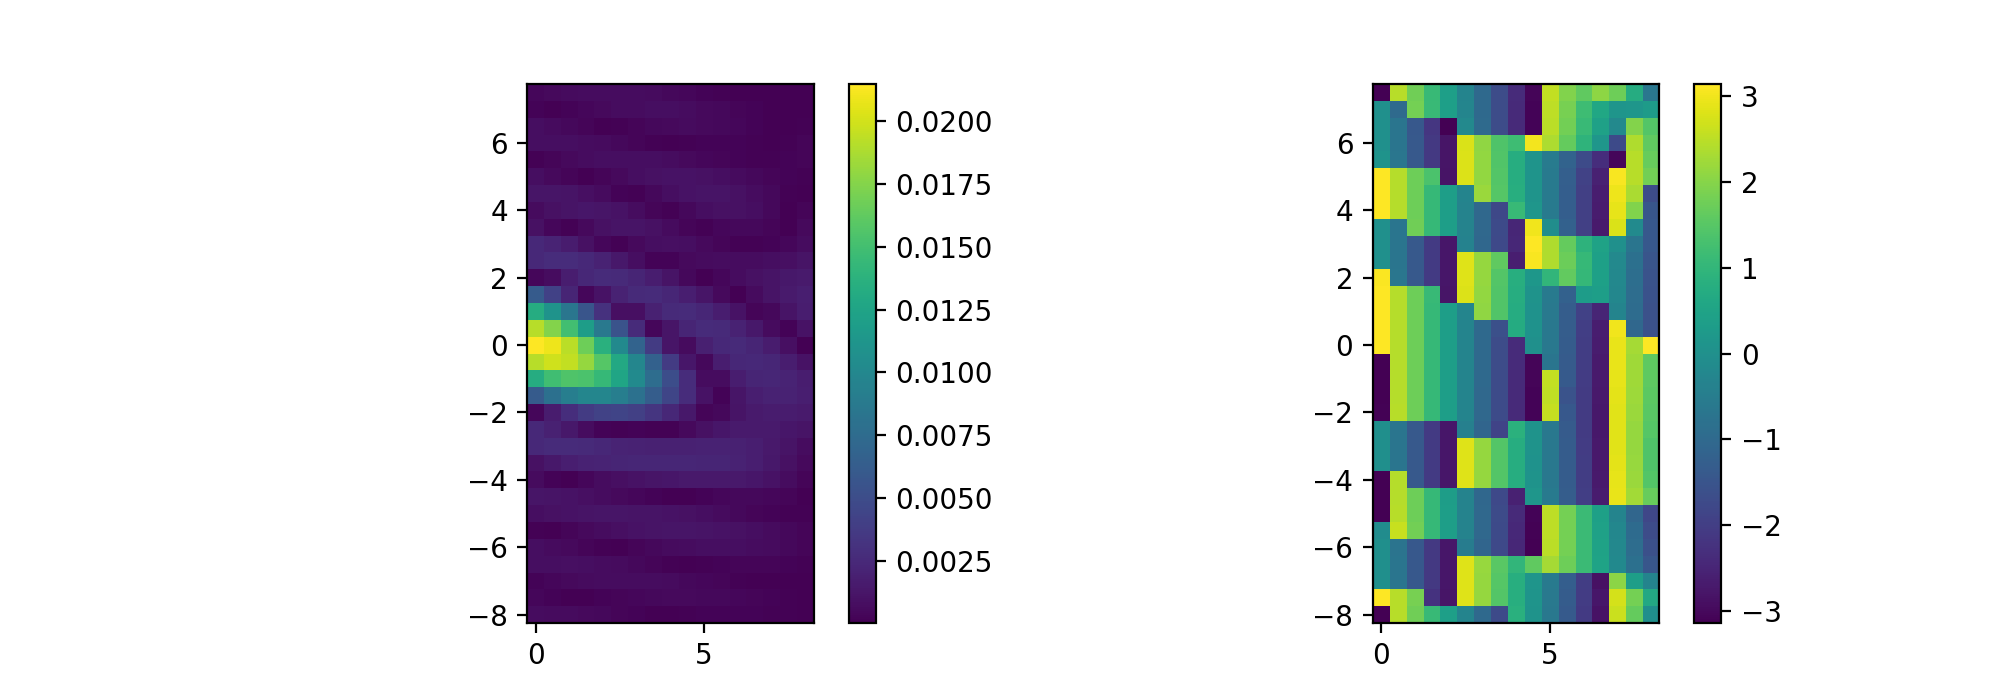

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_ft_real.imshow(ax[0], np.abs(A_ft_real))
fig.colorbar(im, ax=ax[0])
im = grid_ft_real.imshow(ax[1], np.angle(A_ft_real))
fig.colorbar(im, ax=ax[1]);

In [14]:
E_theory_real = e.fourier_transform_grid(grid_ft_real)

<IPython.core.display.Javascript object>


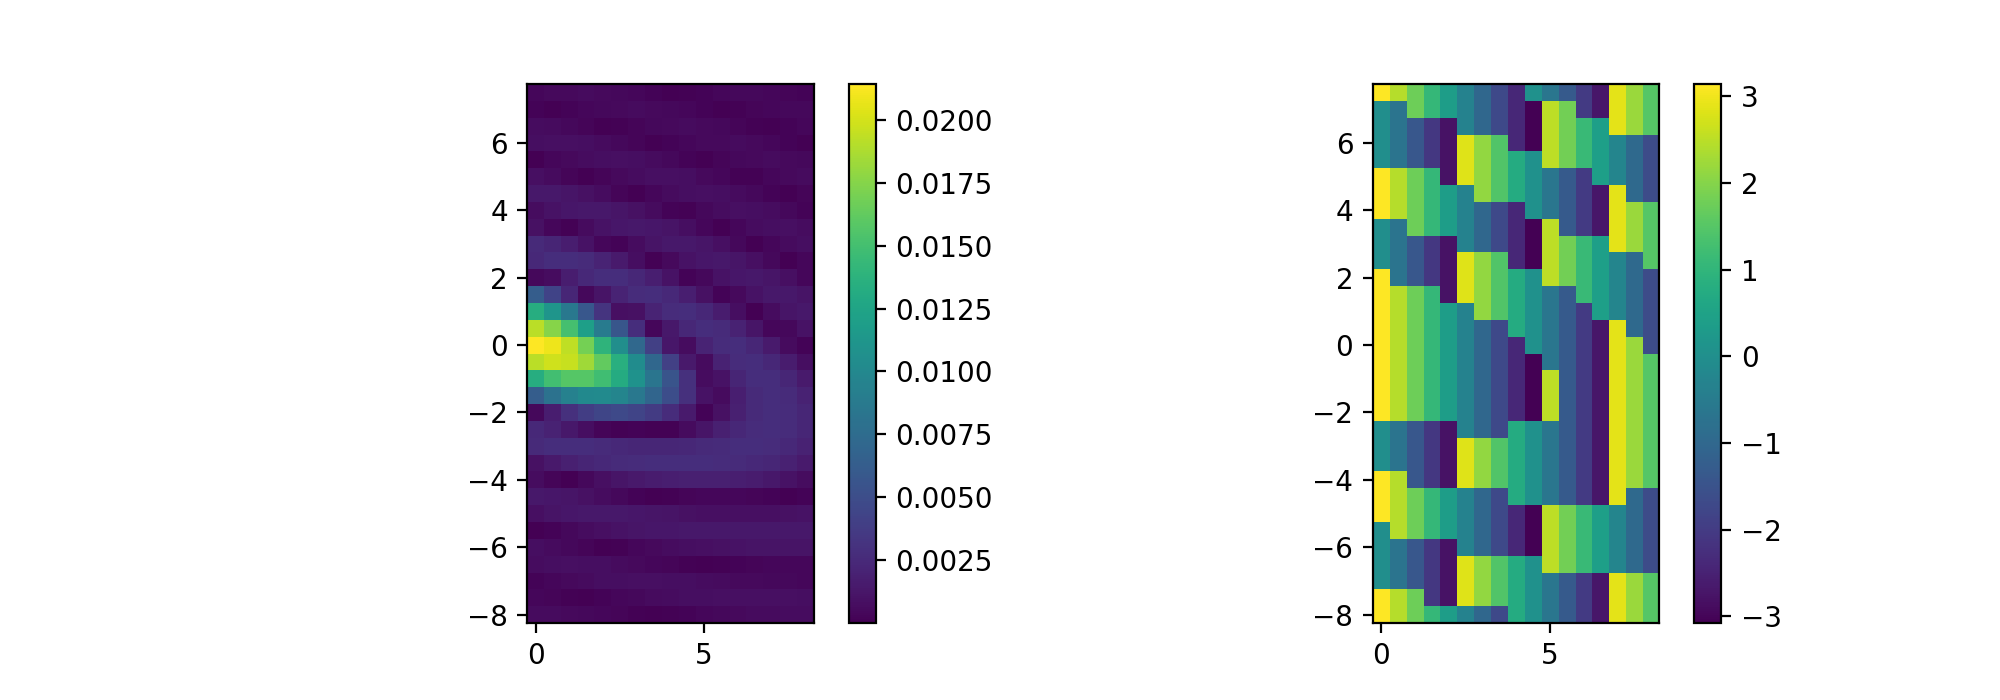

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 3.5))
im = grid_ft_real.imshow(ax[0], np.abs(E_theory_real))
fig.colorbar(im, ax=ax[0])
im = grid_ft_real.imshow(ax[1], np.angle(E_theory_real))
fig.colorbar(im, ax=ax[1]);

## ADD 2D SINC WHILE YOU ARE AT IT

In [16]:
grid_dft, A_dft = grid.dft(A)

In [17]:
grid_idft, A_idft = grid_dft.idft(A_dft)

In [18]:
np.max(np.abs(np.imag(A_idft)))

1.9651164376299768e-17

In [19]:
A_idft = np.real(A_idft)

<IPython.core.display.Javascript object>


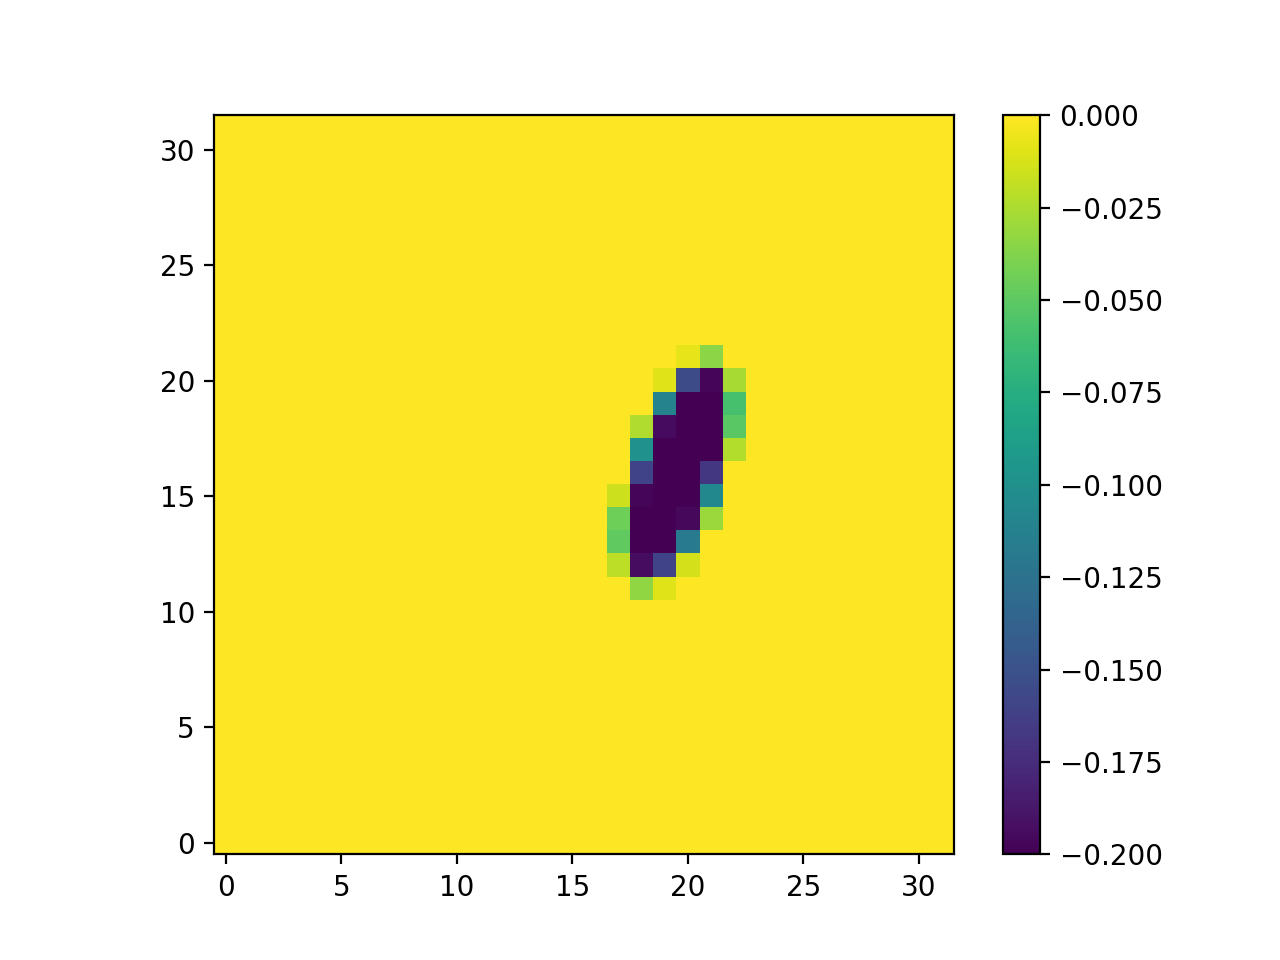

In [20]:
fig, ax = plt.subplots()
im = grid_idft.imshow(ax, A_idft)
fig.colorbar(im);

In [21]:
grid_ift, A_ift = grid_ft.ift(A_ft)

In [22]:
np.max(np.abs(np.imag(A_ift)))

1.9651164376299768e-17

In [23]:
A_ift = np.real(A_ift)

<IPython.core.display.Javascript object>


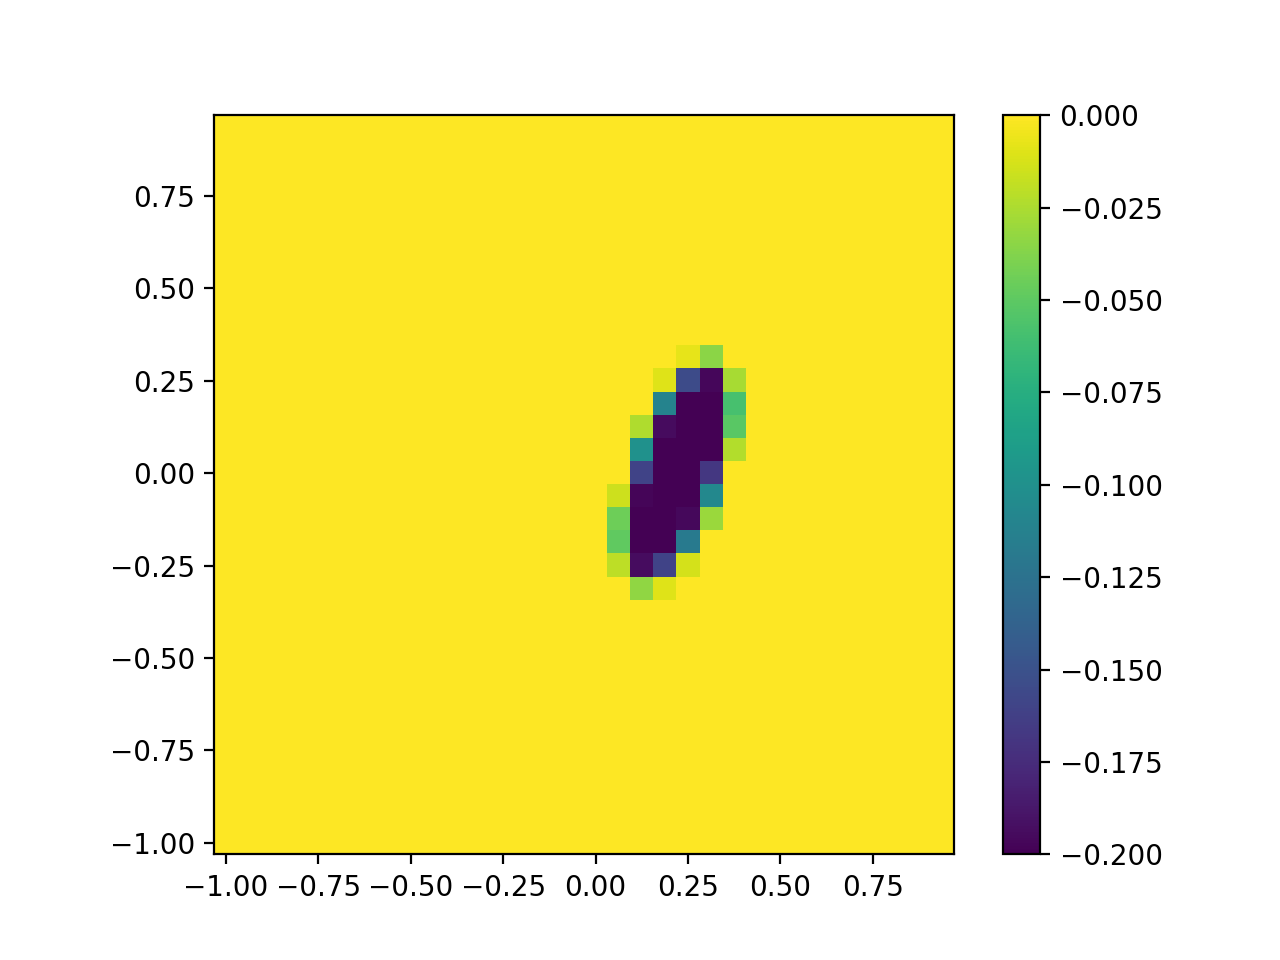

In [24]:
fig, ax = plt.subplots()
im = grid_ift.imshow(ax, A_ift)
fig.colorbar(im);

In [25]:
grid_ift_real, A_ift_real = grid_ft_real.ift(A_ft_real)

<IPython.core.display.Javascript object>


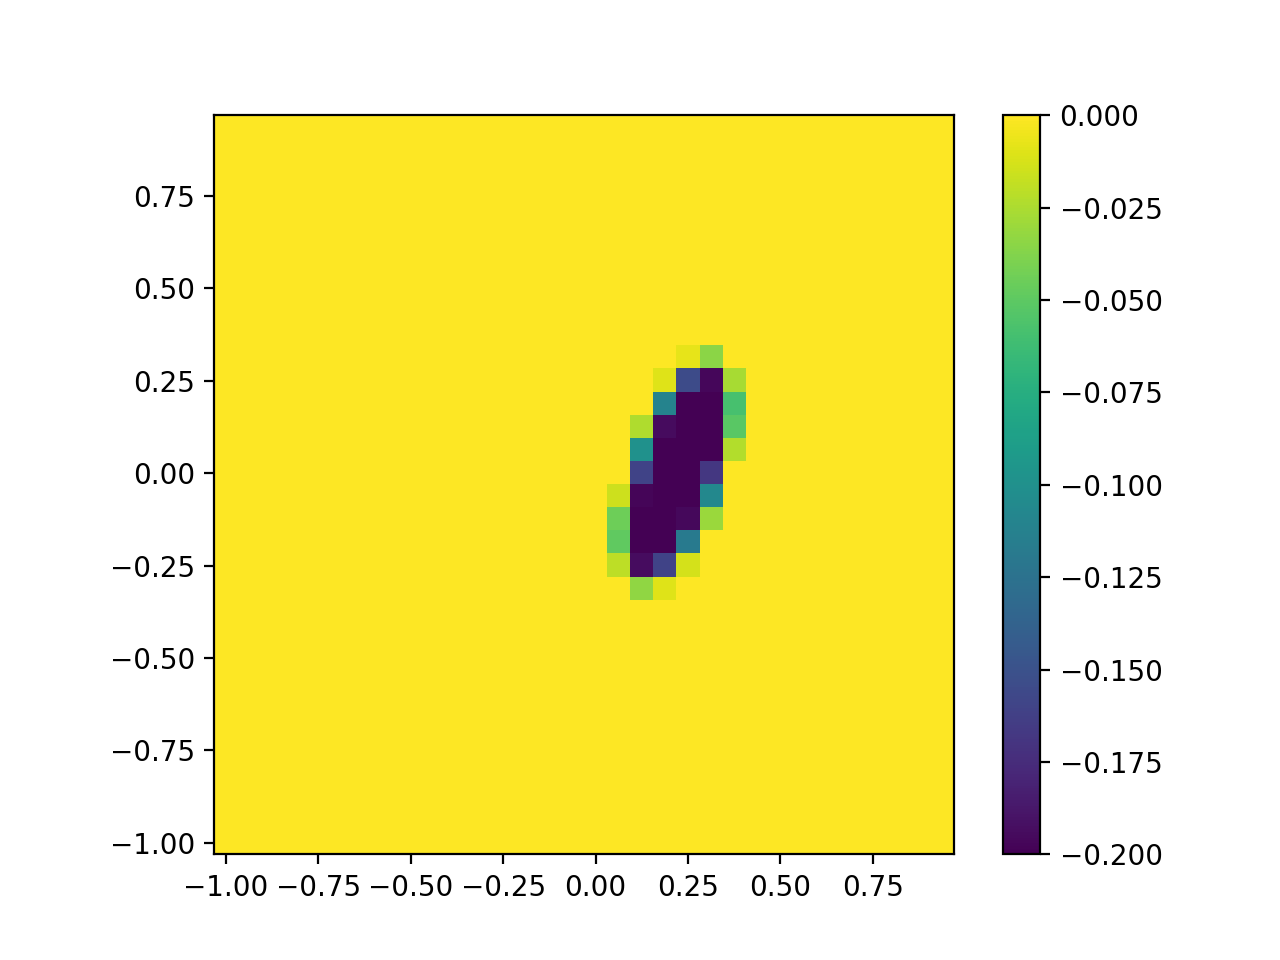

In [26]:
fig, ax = plt.subplots()
im = grid_ift_real.imshow(ax, A_ift_real)
fig.colorbar(im);